# Recitation 7: randomness and looking at data

- Mark Histed
- mark.histed@nih.gov

### Today
- Monte carlo sim
- regression
- polyfit()
- lowess()

- **quiz stuff**
  - normal, uniform, exponential
  - histogram (normed)
  - confidence intervals
  - distributions
  - coeff of variation, mean, std., var
  - hashing
  - parameters to functions
  - double-under-bar methods
  - lambda functions
  - polymorphism vs. inheritance
  - exceptions: try/except
  - confidence intervals
  - monte carlo vs. brute force

In [ ]:
import numpy as np
%matplotlib inline

In [ ]:
%qtconsole

In [118]:
# monte carlo

# ndarray: ndims, shape, indexing
# discuss: dtype of doorsA
#import numba
#@numba.jit
doorsA = np.array(['goat', 'goat', 'prize'], dtype='U10')  # or S10
def isGoat(montyOpens=True, switch=True):
    randorder = np.random.permutation(3)
    tDoorsA = doorsA[randorder]
    choiceN=0
    if montyOpens:
        for iR in [1,2]:
            if tDoorsA[iR] == 'goat':
                tDoorsA[iR] = 'opened'
                break
    if switch:
        notOpened = np.where(tDoorsA!='opened')#[0]
        switchTarg = np.setdiff1d(notOpened, choiceN)[0]
        #print(switchTarg)
        choiceN = switchTarg
    #print(tDoorsA[choiceN])
    #import pdb; pdb.set_trace()
    if tDoorsA[choiceN] == 'goat':
        return(True)
    else:
        return(False)

isGoat()



SyntaxError: invalid syntax (<ipython-input-118-65bec7ef0479>, line 7)

In [117]:
%%timeit
# one simulation
nReps = 10000
goatV = np.nan*np.zeros((nReps,))

for iR in range(nReps):
    goatV[iR] = isGoat(montyOpens=True, switch=True)

1 loop, best of 3: 477 ms per loop


(array([ 651.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  349.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

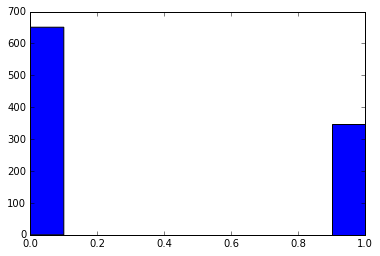

In [96]:
plt.hist(goatV)

In [110]:
# run for all combinations of open and switch
nReps = 10000
goatV = np.nan*np.zeros((nReps,))

openL = [True,True,False,False]
switchL = [True,False,True,False]
pctV = np.nan*np.zeros((4,))
for iP in range(len(pctV)):
    for iR in range(nReps):
        goatV[iR] = isGoat(montyOpens=openL[iP], switch=switchL[iP])
    pctV[iP] = np.sum(goatV)/len(goatV)

print(pctV)
#plt.hist(goatV, cumulative=True)


[ 0.3236  0.6675  0.6672  0.6633]


In [107]:
# show pdb in console: use to debug the choiceN vector in the cell above
import pdb; pdb.pm()

> <ipython-input-105-fe96e0882896>(22)isGoat()
-> if tDoorsA[choiceN] == 'goat':
(Pdb) p choiceN
array([1, 2])
(Pdb) q


In [111]:
# monte carlo with vectors
goat = 0
opened = np.nan
prize = 1
a_ = np.array

nReps = 10
doorMat = np.tile(a_([0,1,1], 'f8'), reps=[nReps,1])
print(doorMat)
shuffleNs = np.vstack([np.random.permutation(3) for x in range(nReps)])
print(shuffleNs)
doorMat = np.take(doorMat, shuffleNs)
print(doorMat)

[[ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]]
[[1 2 0]
 [0 1 2]
 [0 1 2]
 [0 2 1]
 [0 1 2]
 [2 0 1]
 [0 2 1]
 [1 2 0]
 [0 2 1]
 [2 0 1]]
[[ 1.  1.  0.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 1.  0.  1.]
 [ 0.  1.  1.]
 [ 1.  1.  0.]
 [ 0.  1.  1.]
 [ 1.  0.  1.]]


In [ ]:
# np.nonzero returns tuple
np.nonzero(doorMat[:,1:]==1)

In [112]:
# do open
openXY = np.nonzero(doorMat[:,1:]==1)

#  np.unique(return_index=True): returns tuple
np.unique(openXY[0], return_index=True)

desNs=np.unique(openXY[0], return_index=True)[1]
print(desNs)
openN = openXY[1][desNs]+1
print(openN)

doorMat2 = doorMat.copy()
doorMat2[openXY[0][desNs],openN] = np.nan
print(doorMat2)

[ 0  1  3  5  7  9 10 12 13 15]
[1 1 1 1 1 2 1 1 1 2]
[[  1.  nan   0.]
 [  0.  nan   1.]
 [  0.  nan   1.]
 [  0.  nan   1.]
 [  0.  nan   1.]
 [  1.   0.  nan]
 [  0.  nan   1.]
 [  1.  nan   0.]
 [  0.  nan   1.]
 [  1.   0.  nan]]


In [114]:
# do switch 
print(~np.isnan(doorMat2[:,1:]))
#print(np.nonzero(~np.isnan(doorMat2[:,1:])))
#print(np.nonzero(~np.isnan(doorMat2[:,1:]))[1])

switchToNs = np.nonzero(~np.isnan(doorMat2[:,1:]))[1]+1
print(switchToNs)
doorMat2[switchToNs,:]

goatV = np.choose(switchToNs, doorMat2.T)
print(goatV)
np.sum(goatV)/len(goatV)


[[False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]]
[2 2 2 2 2 1 2 2 2 1]
[ 0.  1.  1.  1.  1.  0.  1.  0.  1.  0.]


0.59999999999999998

In [116]:
%%timeit
# monte carlo with vectors
# full code


nReps = 10000
doorMat = np.tile(a_([0,1,1], 'f8'), reps=[nReps,1])
shuffleNs = np.vstack([np.random.permutation(3) for x in range(nReps)])
doorMat = np.take(doorMat, shuffleNs)

# open
openXY = np.nonzero(doorMat[:,1:]==1)
np.unique(openXY[0], return_index=True)
desNs=np.unique(openXY[0], return_index=True)[1]
openN = openXY[1][desNs]+1
doorMat2 = doorMat.copy()
doorMat2[openXY[0][desNs],openN] = np.nan

# switch
switchToNs = np.nonzero(~np.isnan(doorMat2[:,1:]))[1]+1
doorMat2[switchToNs,:]

# calc
goatV = np.choose(switchToNs, doorMat2.T)
np.sum(goatV)/len(goatV)

10 loops, best of 3: 105 ms per loop


# simple regression


In [124]:
# load data
import scipy.io
m0 = scipy.io.loadmat('./ExampleData/data2-i1114-161031.mat')

input = m0['input']
reactTimesV = np.hstack([x[0][0] for x in input['reactTimesMs'][0][0][0]])
print(reactTimesV)

tGratingContrast = np.hstack([x[0][0] for x in input['tGratingContrast'][0][0][0]])
trialOutcome = np.hstack([x[0] for x in input['trialOutcomeCell'][0][0][0]])
successIx = trialOutcome == 'success'



#print(1)

[  549   549  -125  -804   549   549   549   550   549   549   549   550
   549 -2762   549   550   550 -1667   549   549   550   549   550   549
  -555 -1020   549   549   550   549   550   549  -748   549   550   549
   549   549   549 -1301   549   550   333   549  -500   247   549   238
  -547   252   277    -9   391   550   418  -226   260   315  -580   549
   549   549  -452   549   550  -130   278   320   302  -680   549   550
 -1135   549   550   550  -608   549   301   112   -76 -1116   282   371
   211  -545   292   273   257   209  -384   302  -177   235   265 -1163
   233   549   243   269   359 -1147   424   234   174   191  -459   309
   183   277   266   237  -190 -1196   550 -1003   549   263   228   213
   193   285  -581   325   266   303   257   291 -1072   368   234 -1675
   317   219   237  -459   236   255  -392 -1792   549   233   346 -1830
   323  -843 -2230   272  -555   414   337 -1676   364   231   230  -395
   320   443 -1403   421    98   245  -584   269   

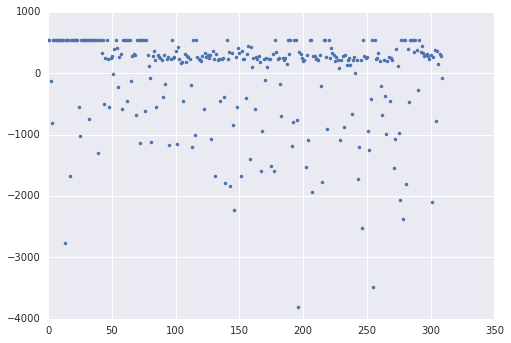

In [125]:
import seaborn as sns
plt.plot(reactTimesV, '.')

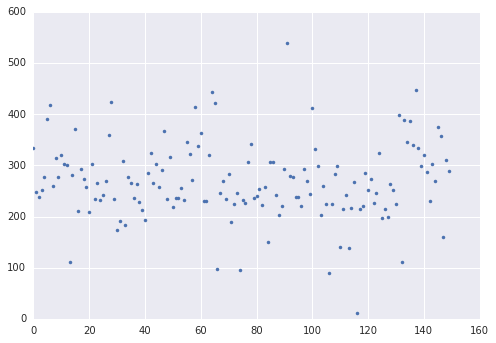

In [128]:
plt.plot(reactTimesV[successIx & (reactTimesV>0)], '.')

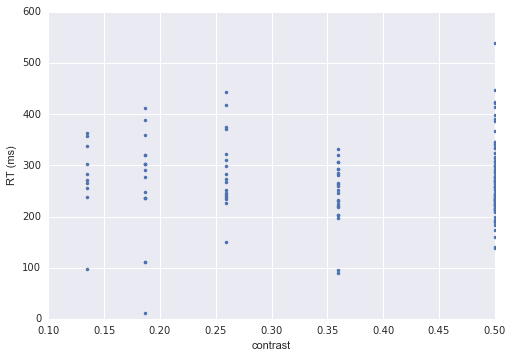

In [135]:
desIx = (successIx) & (reactTimesV > 0)
plt.plot(tGratingContrast[desIx], reactTimesV[desIx], '.')
plt.xlabel('contrast')
plt.ylabel('RT (ms)')

In [136]:
import scipy.stats
#xs = tGratingContrast[desIx]
ys = reactTimesV[desIx] 
#ys = ys + np.linspace(0,100,len(ys)); print('Adding fake trend')


xs = np.r_[0:len(ys)]

print(np.shape(ys))

#ys = reactTimesV[successIx & (reactTimesV>0)]
res = scipy.stats.linregress(xs,ys)

print(res.rvalue**2)
print(res)


(150,)
0.000932001752653
LinregressResult(slope=-0.0527081203609049, intercept=272.54675496688742, rvalue=-0.030528703749962065, pvalue=0.71074377116856358, stderr=0.14185212000559383)


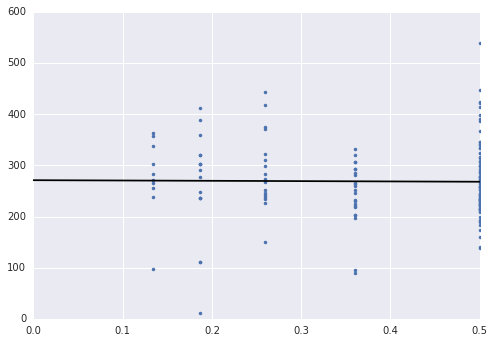

In [139]:
plt.plot(xs,ys,'.')
xs0 = np.linspace(0,0.5,100)
plt.plot(xs0, xs0*res.slope+res.intercept, 'k')

## polyfit

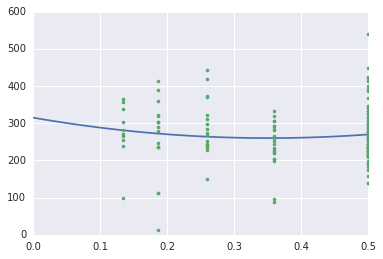

In [140]:
%matplotlib inline
coeff = np.polyfit(xs, ys,2)
plt.plot(xs0, coeff[0]*xs0**2 + coeff[1]*xs0**1 + coeff[2])
plt.plot(xs, ys, '.')

In [130]:
%qtconsole

## lowess

(0, 0.6)

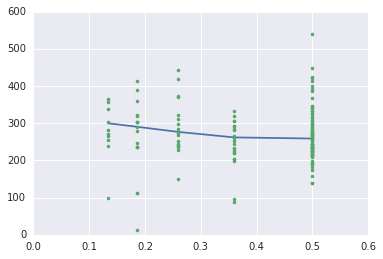

In [141]:
import statsmodels.nonparametric.api
a_ = np.array
smY = statsmodels.nonparametric.api.lowess(a_(ys, dtype='f8'),
                                               a_(xs,dtype='f8'),
                                               0.9,
                                               it=10,
                                               missing='drop')
plt.plot(smY[:,0], smY[:,1])
plt.plot(xs,ys,'.')
plt.xlim((0,0.6))

In [146]:
arr = np.zeros(3,)
#arr[10]
try:
    arr[10]
except IndexError:
    print('Array too short, exiting')
    raise


Array too short, exiting


IndexError: index 10 is out of bounds for axis 0 with size 3

In [ ]:
import os
try
    os.mkdir('new_dir')
except ExistsError:
    pass



In [152]:
def f():
    print('once')
def g():
    print('1 ', end="")

def runTenTimes(functionIn):
    for a in range(10):
        functionIn()


runTenTimes(f)
runTenTimes(g)



once
once
once
once
once
once
once
once
once
once
1 1 1 1 1 1 1 1 1 1 